In [12]:
import tensorflow as tf

In [13]:
import keras

In [14]:
import numpy as np

In [15]:
np.__version__

'1.19.3'

In [16]:
tf.__version__

'2.4.1'

In [17]:
from sklearn.datasets import load_digits

In [19]:
import matplotlib.pyplot as plt

In [62]:
digits = load_digits()

In [63]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [64]:
digits.data.shape

(1797, 64)

In [65]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [66]:
digits.target.shape

(1797,)

In [67]:
image = digits.data[0]

In [68]:
print(image)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [69]:
image = digits.data[55]

In [70]:
print(image)

[ 0.  0.  2. 14. 15.  5.  0.  0.  0.  0. 10. 16. 16. 15.  1.  0.  0.  3.
 16. 10. 10. 16.  4.  0.  0.  5. 16.  0.  0. 14.  6.  0.  0.  5. 16.  6.
  0. 12.  7.  0.  0.  1. 15. 13.  4. 13.  6.  0.  0.  0. 11. 16. 16. 15.
  0.  0.  0.  0.  2. 11. 13.  4.  0.  0.]


In [71]:
image.shape

(64,)

In [72]:
np.reshape(image, (8, 8))

array([[ 0.,  0.,  2., 14., 15.,  5.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 15.,  1.,  0.],
       [ 0.,  3., 16., 10., 10., 16.,  4.,  0.],
       [ 0.,  5., 16.,  0.,  0., 14.,  6.,  0.],
       [ 0.,  5., 16.,  6.,  0., 12.,  7.,  0.],
       [ 0.,  1., 15., 13.,  4., 13.,  6.,  0.],
       [ 0.,  0., 11., 16., 16., 15.,  0.,  0.],
       [ 0.,  0.,  2., 11., 13.,  4.,  0.,  0.]])

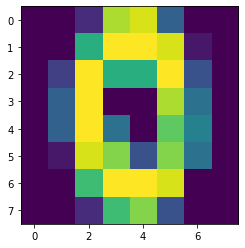

In [73]:
plt.imshow(np.reshape(image, (8, 8)))

In [74]:
digits.target[55]

0

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [77]:
x_train.shape

(1437, 64)

In [78]:
x_test.shape

(360, 64)

In [79]:
x_train = x_train.reshape(1437, 8, 8, 1)

In [80]:
x_test = x_test.reshape(360, 8, 8, 1)

In [81]:
y_train.shape

(1437,)

In [82]:
y_train

array([1, 6, 0, ..., 9, 0, 8])

In [83]:
from keras.utils import to_categorical

In [84]:
y_train = to_categorical(y_train)

In [85]:
y_test = to_categorical(y_test)

In [86]:
y_train.shape

(1437, 10)

In [87]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [88]:
from keras.models import Sequential

In [89]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [90]:
model = Sequential()

In [91]:
model = Sequential([Conv2D(6, 3, input_shape=(8, 8, 1)), MaxPooling2D(pool_size=2), Flatten(), Dense(10, activation='softmax')])

In [92]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [93]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
45/45 [==============================] - 1s 11ms/step - loss: 9.2560 - accuracy: 0.0800 - val_loss: 3.8335 - val_accuracy: 0.1333
Epoch 2/10
45/45 [==============================] - 0s 5ms/step - loss: 3.5992 - accuracy: 0.1521 - val_loss: 2.4584 - val_accuracy: 0.2694
Epoch 3/10
45/45 [==============================] - 0s 5ms/step - loss: 2.3678 - accuracy: 0.3088 - val_loss: 1.6249 - val_accuracy: 0.4556
Epoch 4/10
45/45 [==============================] - 0s 5ms/step - loss: 1.6417 - accuracy: 0.4897 - val_loss: 1.1141 - val_accuracy: 0.6333
Epoch 5/10
45/45 [==============================] - 0s 5ms/step - loss: 1.1776 - accuracy: 0.6297 - val_loss: 0.8268 - val_accuracy: 0.7333
Epoch 6/10
45/45 [==============================] - 0s 5ms/step - loss: 0.8314 - accuracy: 0.7530 - val_loss: 0.6636 - val_accuracy: 0.8028
Epoch 7/10
45/45 [==============================] - 0s 6ms/step - loss: 0.6594 - accuracy: 0.8068 - val_loss: 0.5519 - val_accuracy: 0.8389
Epoch 8/10
45/45 [=

In [94]:
model.predict(x_test[0:1])

array([[4.0756572e-02, 9.7748190e-02, 8.9854831e-03, 2.1444334e-04,
        1.2078992e-02, 4.5911218e-03, 3.3936533e-01, 9.2609442e-04,
        4.9524456e-01, 8.9246772e-05]], dtype=float32)

In [95]:
y_test[0:1]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

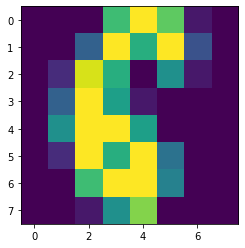

In [96]:
plt.imshow(np.reshape(x_test[0], (8, 8)))

In [98]:
model.predict(x_test[100:101])

array([[1.1497880e-03, 1.9565519e-04, 1.3808639e-02, 3.6079206e-02,
        1.2713030e-05, 2.1340926e-03, 6.9589849e-05, 8.0186810e-04,
        2.5387839e-03, 9.4320971e-01]], dtype=float32)

In [99]:
y_test[100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

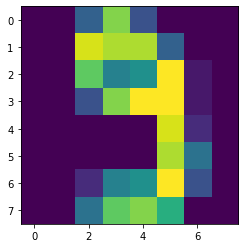

In [100]:
plt.imshow(np.reshape(x_test[100], (8, 8)))

In [102]:
from keras.datasets import mnist

In [103]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


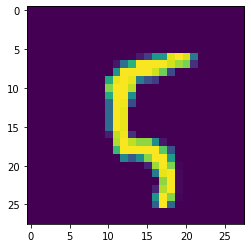

In [104]:
plt.imshow(x_train[100])